In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Netfilx Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Netfilx Stock Price')
    plt.title('Netfilx Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Netfilx Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# First, we get the data
dataset = pd.read_csv('NFLX.csv', index_col='date', parse_dates=['date'])
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price,Pre_5,Pre_4,Pre_3,Pre_2,Pre_1,ln_vol,ln(Pre_1_vol),Pre_1_vol
date,,,,,,,,,,,,,,,,
2017-01-10,2017/1/3,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,129.889999,127.489998,129.410004,131.809998,131.070007,130.949997,15.57,15.568495,5771800
2017-01-11,2017/1/4,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,130.500000,129.410004,131.809998,131.070007,130.949997,129.889999,15.60,15.604901,5985800
2017-01-12,2017/1/5,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,129.179993,131.809998,131.070007,130.949997,129.889999,130.500000,15.54,15.540970,5615100
2017-01-13,2017/1/6,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,133.699997,131.070007,130.949997,129.889999,130.500000,129.179993,15.50,15.499852,5388900
2017-01-17,2017/1/9,131.479996,131.990005,129.889999,130.949997,130.949997,5771800,132.889999,130.949997,129.889999,130.500000,129.179993,133.699997,16.17,16.168313,10515000


In [ ]:
# Checking for missing values
training_set = dataset[:'2020'].iloc[:,8:14].values
test_set = dataset['2021':].iloc[:,8:14].values

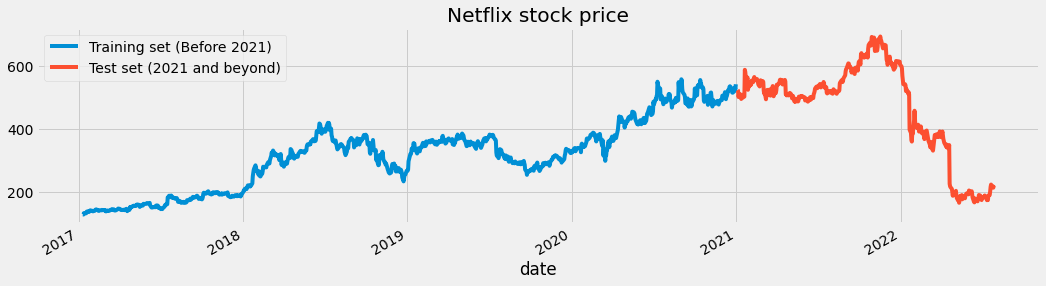

In [ ]:
# We have chosen 'Close' attribute for prices. Let's see what it looks like
dataset["price"][:'2020'].plot(figsize=(16,4),legend=True)
dataset["price"]['2021':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2021)','Test set (2021 and beyond)'])
plt.title('Netflix stock price')
plt.show()

In [ ]:
test_set.shape

(394, 6)

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=100)

Epoch 1/50
10/10 [==============================] - 9s 186ms/step - loss: 0.0839
Epoch 2/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0209
Epoch 3/50
10/10 [==============================] - 2s 184ms/step - loss: 0.0133
Epoch 4/50
10/10 [==============================] - 2s 180ms/step - loss: 0.0088
Epoch 5/50
10/10 [==============================] - 2s 184ms/step - loss: 0.0068
Epoch 6/50
10/10 [==============================] - 2s 181ms/step - loss: 0.0069
Epoch 7/50
10/10 [==============================] - 2s 180ms/step - loss: 0.0068
Epoch 8/50
10/10 [==============================] - 2s 185ms/step - loss: 0.0062
Epoch 9/50
10/10 [==============================] - 2s 180ms/step - loss: 0.0059
Epoch 10/50
10/10 [==============================] - 2s 180ms/step - loss: 0.0054
Epoch 11/50
10/10 [==============================] - 2s 185ms/step - loss: 0.0058
Epoch 12/50
10/10 [==============================] - 2s 181ms/step - loss: 0.0053
Epoch 13/50
10/10 [======

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset[:'2020'].iloc[:,8:14],dataset['2021':].iloc[:,8:14]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,len(test_set)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)

data2 = pd.DataFrame(dataset['2021':].iloc[0:334,8:14])
data2.iloc[:,4] = predicted_stock_price	#新数据列替换D列数据
data2 = sc.inverse_transform(data2)	#反归一化

predicted_stock_price=data2[:,4]
data3=pd.DataFrame(predicted_stock_price)
data3

In [ ]:
# Visualizing the results for LSTM
LSTM_result=pd.read_csv('result.csv')

a=LSTM_result.a
c=LSTM_result.c
b=LSTM_result.b
d=LSTM_result.d
date=LSTM_result.date
LSTM_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    329 non-null    object 
 1   a       329 non-null    float64
 2   b       329 non-null    float64
 3   c       329 non-null    float64
 4   d       329 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.0+ KB


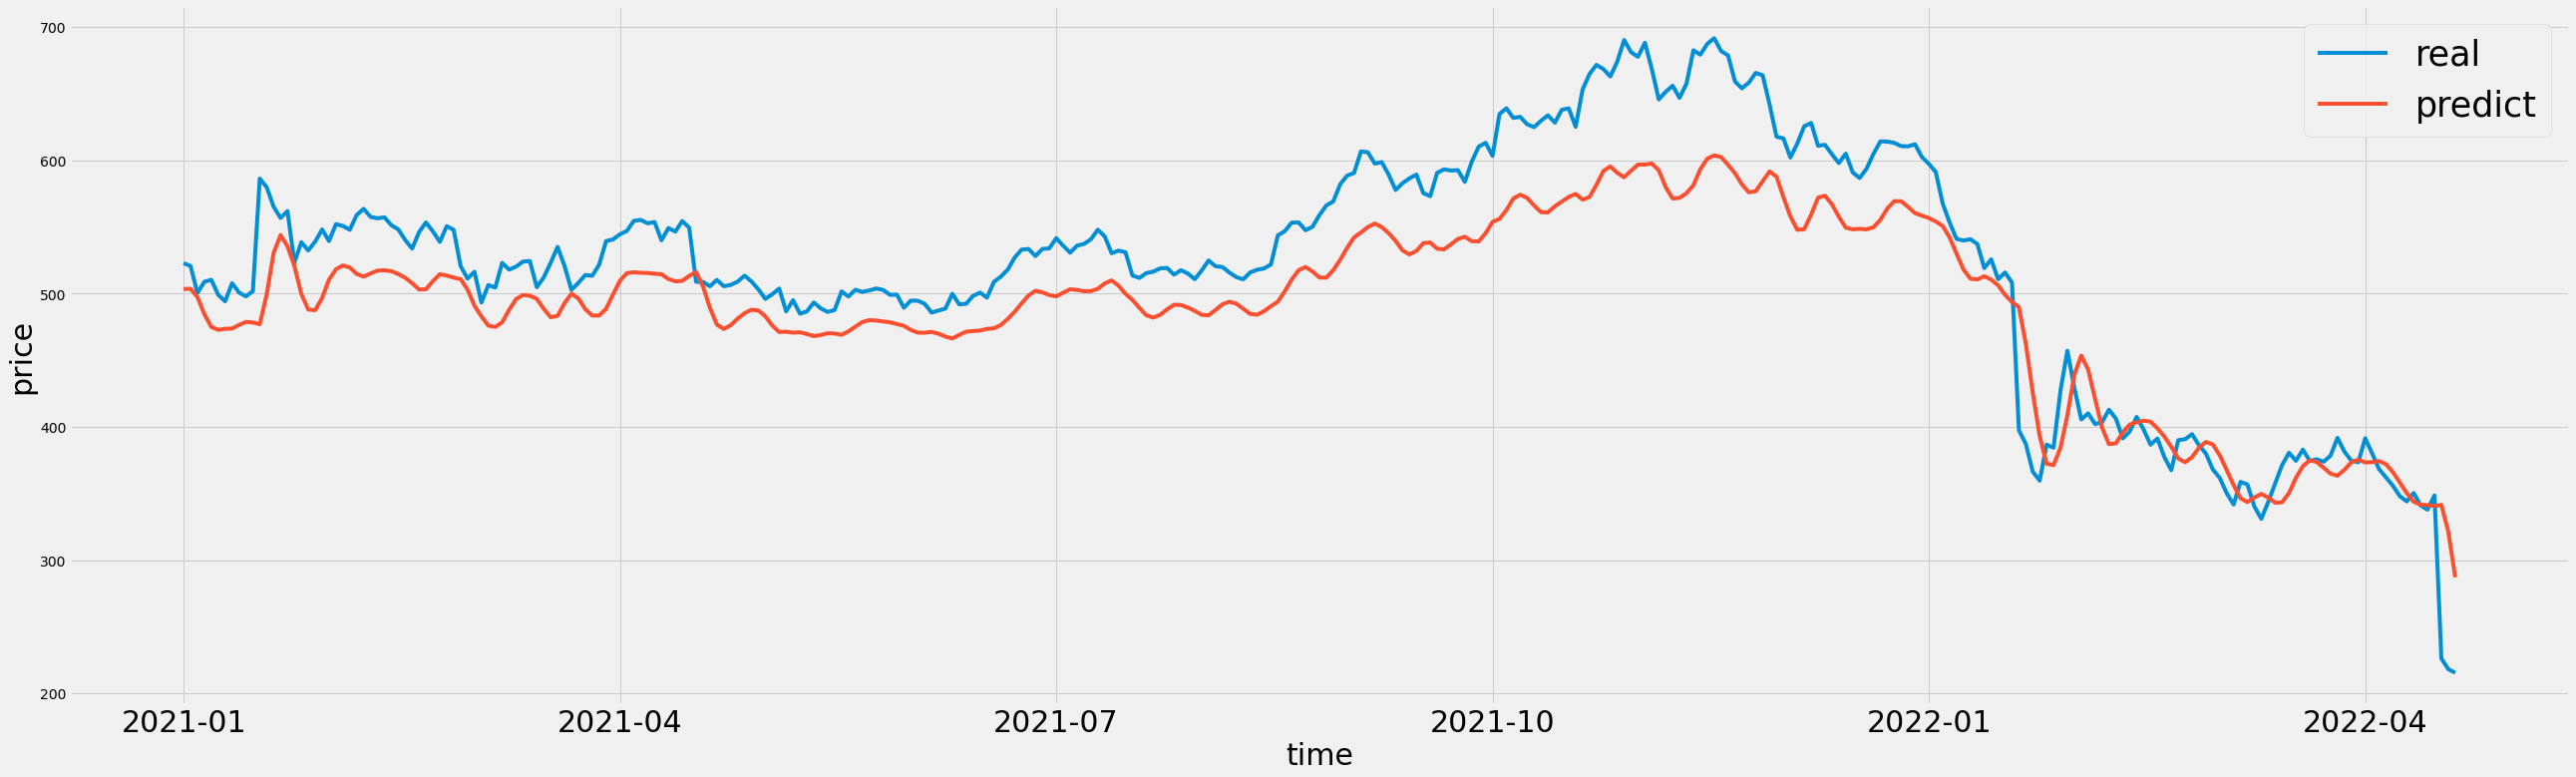

In [ ]:
from IPython.core.pylabtools import figsize
plt.figure(figsize(40,12))
plt.plot(date,a,label="real")
plt.plot(date,b,label="predict")
plt.xlabel("time",fontsize=30)
plt.xticks(date[::63],labels=['2021-01','2021-04','2021-07','2021-10','2022-01','2022-04'],fontsize=30)
plt.ylabel("price",fontsize=30)
plt.legend(loc="upper right",fontsize=35)
plt.show()

In [ ]:
LSTM_MSE=mean_squared_error(a,b)
print(LSTM_MSE)
LSTM_r2=r2_score(a,b)
print(LSTM_r2)

1843.5982539220179
0.7758377484940042
